# Sentiment Analysis: Predicting sentiment of COVID-19 Tweets

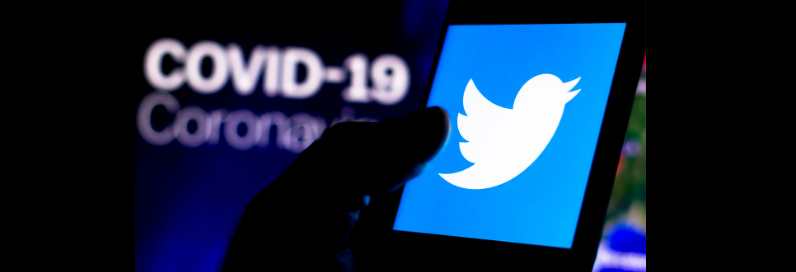

**Problem Description:**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.

**Notebook Context:**

This notebook aims at building at text classification engine from the content of Coronavirus Tweets NLP - Text Classifiation dataset that contains around 41157 reviews. Basically, the engine works as follows: after user has provided with tweet, the engine cleans the data and tries to classify the tweet as positive, negative or neutral.

## 1. Importing Libraries and Loading Dataset

In [1]:
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [2]:
# checking GPU availability for computational power 
# 0 = GPU Active 
# 1 = GPU inactive
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
%matplotlib inline
# For more plotting options
import seaborn as sns
plt.style.use('seaborn-darkgrid')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('words')
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
from gensim.models import Word2Vec
import io # allows us to manage the file-related input and output operations
import re # regular expression
import time
import math
import string # create a string template for simpler string substitutions
import urllib #Python module for fetching URLs
import requests # The requests module allows you to send HTTP requests using Python
import neattext.functions as nfx # NLP package for cleaning text.

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
# Loading up the data into a DataFrame
tweet_data = pd.read_csv('Coronavirus Tweets.csv', encoding="ISO-8859-1")

# Shape of data.
print(f'Diamentions: {tweet_data.shape[0]} x {tweet_data.shape[1]}')

Diamentions: 41157 x 6


In [5]:
# Names Of columns in our dataset
tweet_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [6]:
# Display the first 5 rows of the tweet data
tweet_data.head(50)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [7]:
# Display information about the tweet_data DataFrame
# This provides an overview of the dataset's structure and column information
# Useful for understanding the data before performing any analysis or processing

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
# Duplicate rows
tweet_data[tweet_data.duplicated()]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [9]:
# Display the count of tweets based on tweet timing
tweet_data.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

# 2. Data Preprocessing


In [10]:
# checking Null values
nulls = tweet_data.isna().sum().sort_values(ascending=False)
total_elements = tweet_data.shape[0]
null_percentage = (tweet_data.isnull().sum()/total_elements).sort_values(ascending=False)

null_table = pd.concat([nulls, null_percentage], axis=1, keys=['Total_Missing', 'Missing%'])
null_table.reset_index(inplace=True)
null_table.rename(columns= {"index": " Column_Name"})
print(null_table)

           index  Total_Missing  Missing%
0       Location           8590  0.208713
1       UserName              0  0.000000
2     ScreenName              0  0.000000
3        TweetAt              0  0.000000
4  OriginalTweet              0  0.000000
5      Sentiment              0  0.000000


In [11]:
# Check for missing values in the tweet_data DataFrame
# and display the count of missing values for each column

tweet_data.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [12]:
# Sentiment Distribution
sentiment_counts = tweet_data['Sentiment'].value_counts()
sentiment_counts

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

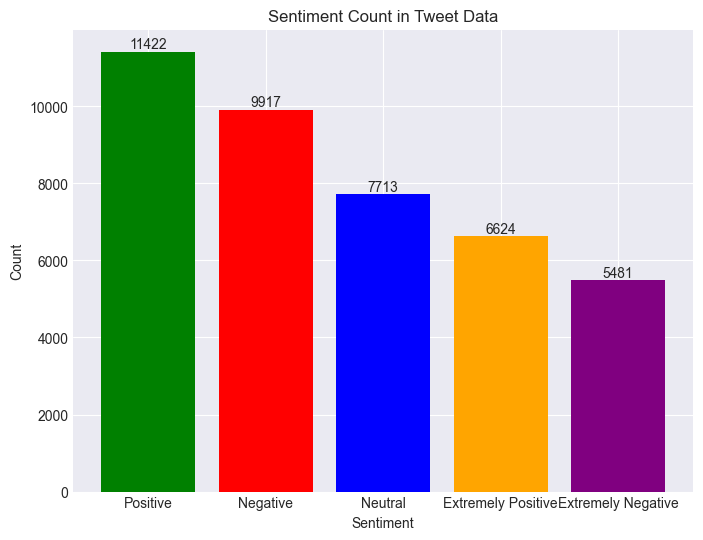

In [13]:
sentiment_counts = tweet_data['Sentiment'].value_counts()

colors = ['green', 'red', 'blue', 'orange', 'purple']  # Specify colors for each bar

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)

# Add count values above the bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count in Tweet Data')

plt.show()


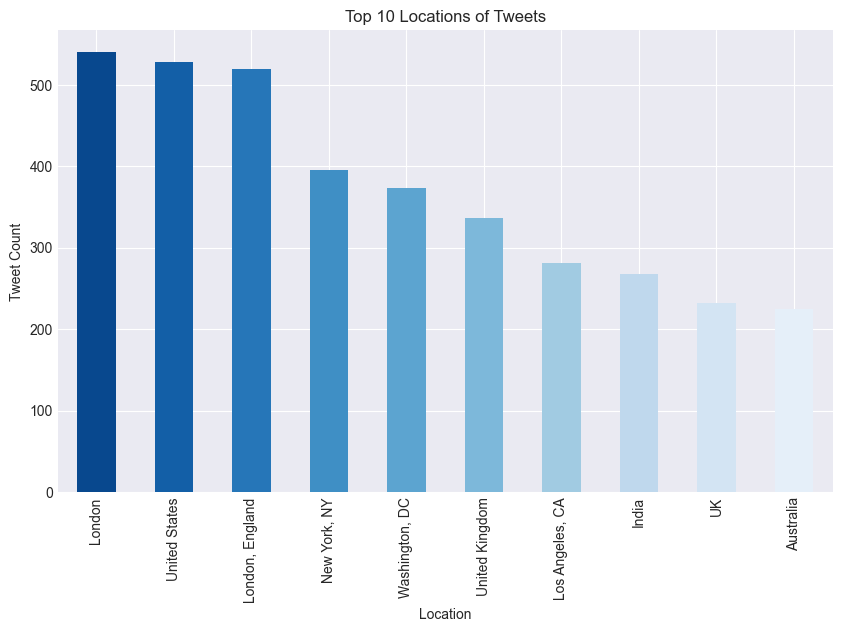

In [15]:
# Calculate the top 10 locations based on tweet count
top_10_locations = tweet_data['Location'].value_counts().head(10)

# Define colors for the bar graph based on count in each location
colors = sns.color_palette("Blues_r", len(top_10_locations))

# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations of Tweets')

plt.show()

In [16]:
tweet_data['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

# Locations with most number of Negative Tweets made

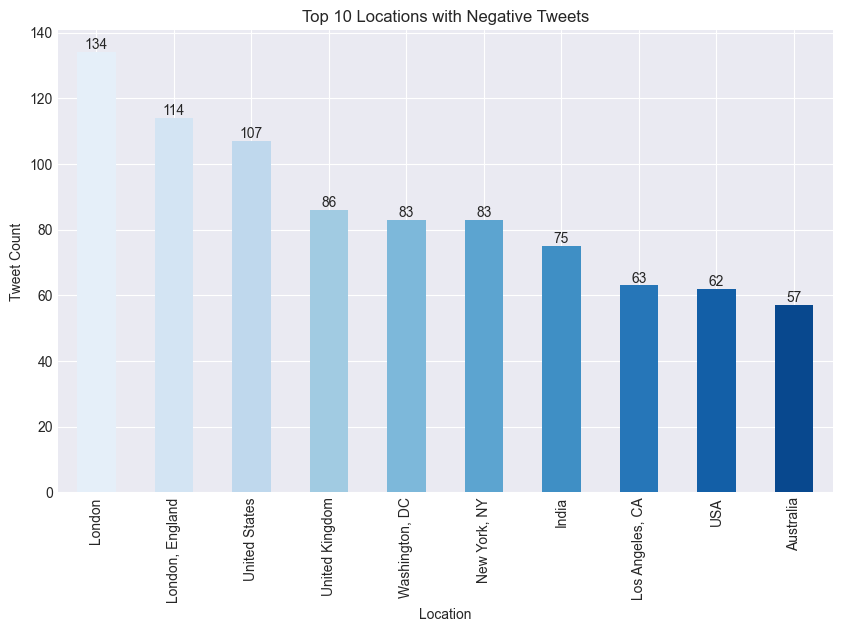

In [17]:
# Filter the data for negative tweets
negative_tweets = tweet_data[tweet_data['Sentiment'] == 'Negative']

# Calculate the counts for each location
location_counts = negative_tweets['Location'].value_counts()

# Select the top 10 locations with the highest counts
top_10_locations = location_counts.head(10)

# Create a color map based on the count of negative tweets in each location
color_map = sns.color_palette("Blues", len(top_10_locations))

# Create a bar plot for the top 10 locations with colors based on the count
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=color_map)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations with Negative Tweets')

# Add data labels above each bar
for i, count in enumerate(top_10_locations):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Locations with most number of Positive Tweets made

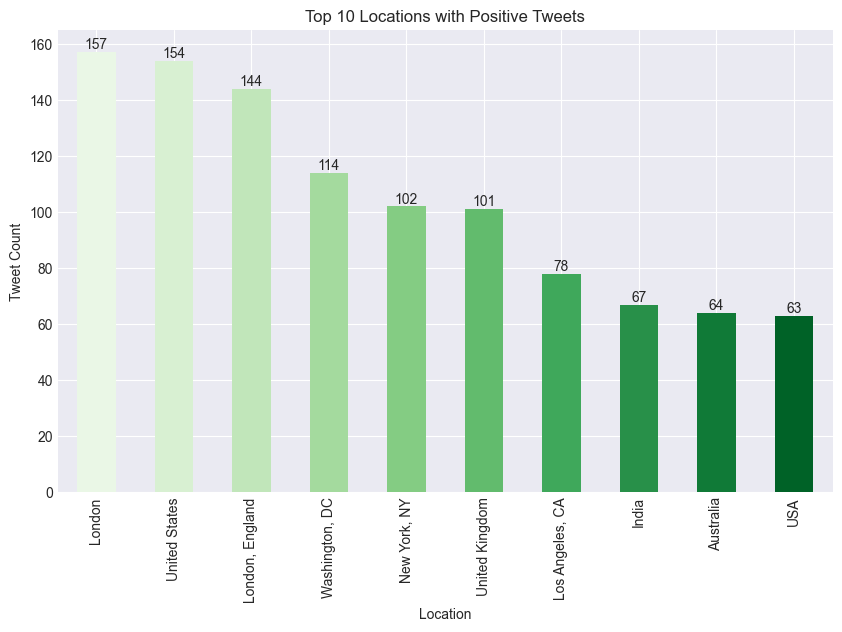

In [18]:
# Filter the data for positive tweets
positive_tweets = tweet_data[tweet_data['Sentiment'] == 'Positive']

# Calculate the counts for each location
location_counts = positive_tweets['Location'].value_counts()

# Select the top 10 locations with the highest counts
top_10_locations = location_counts.head(10)

# Create a color map based on the count of positive tweets in each location
color_map = sns.color_palette("Greens", len(top_10_locations))

# Create a bar plot for the top 10 locations with colors based on the count
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar', color=color_map)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Tweet Count')
plt.title('Top 10 Locations with Positive Tweets')

# Add data labels above each bar
for i, count in enumerate(top_10_locations):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Average Number of Words in a Tweet by Sentiment

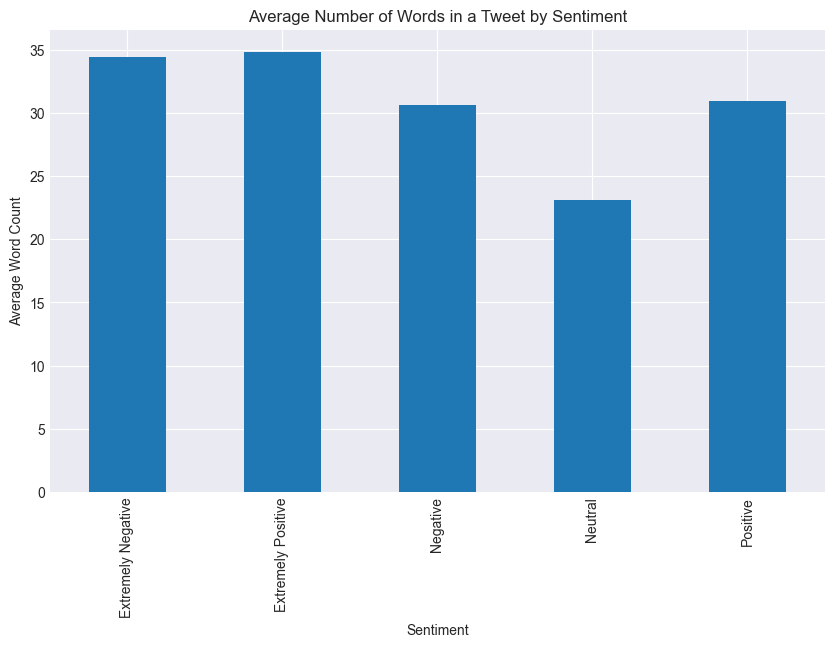

In [19]:
# Calculate the number of words in each tweet
tweet_data['WordCount'] = tweet_data['OriginalTweet'].str.split().str.len()

# Group the data by sentiment and calculate the average word count
wordcount_by_sentiment = tweet_data.groupby('Sentiment')['WordCount'].mean()

# Plot the graph
plt.figure(figsize=(10, 6))
wordcount_by_sentiment.plot(kind='bar')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.title('Average Number of Words in a Tweet by Sentiment')

plt.show()


In [20]:
# Average Character Count in Tweets by Sentiment

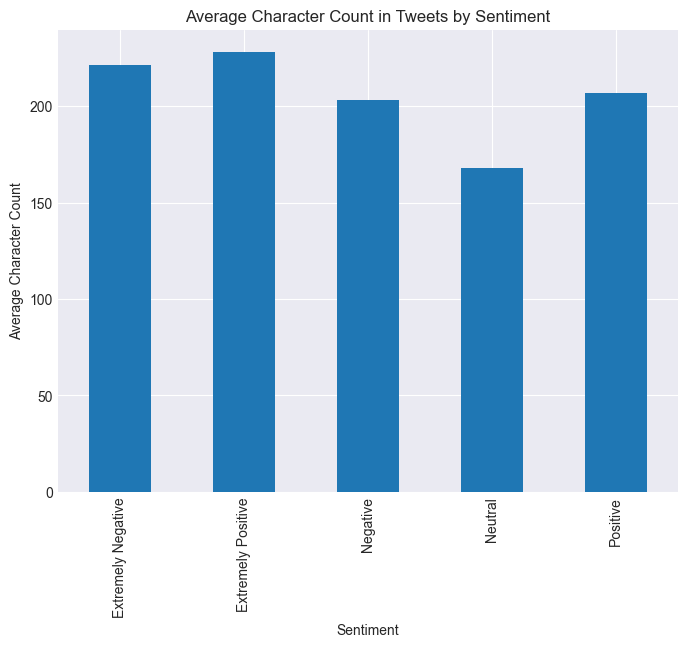

In [21]:
# Calculate the number of characters in each tweet
tweet_data['CharacterCount'] = tweet_data['OriginalTweet'].apply(lambda x: len(str(x)))

# Group the data by sentiment and calculate the average character count for each sentiment
average_character_count = tweet_data.groupby('Sentiment')['CharacterCount'].mean()

# Create a bar plot for the average character count in each sentiment
plt.figure(figsize=(8, 6))
average_character_count.plot(kind='bar')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Average Character Count')
plt.title('Average Character Count in Tweets by Sentiment')

plt.show()


# Top 10 Mentions in Tweets

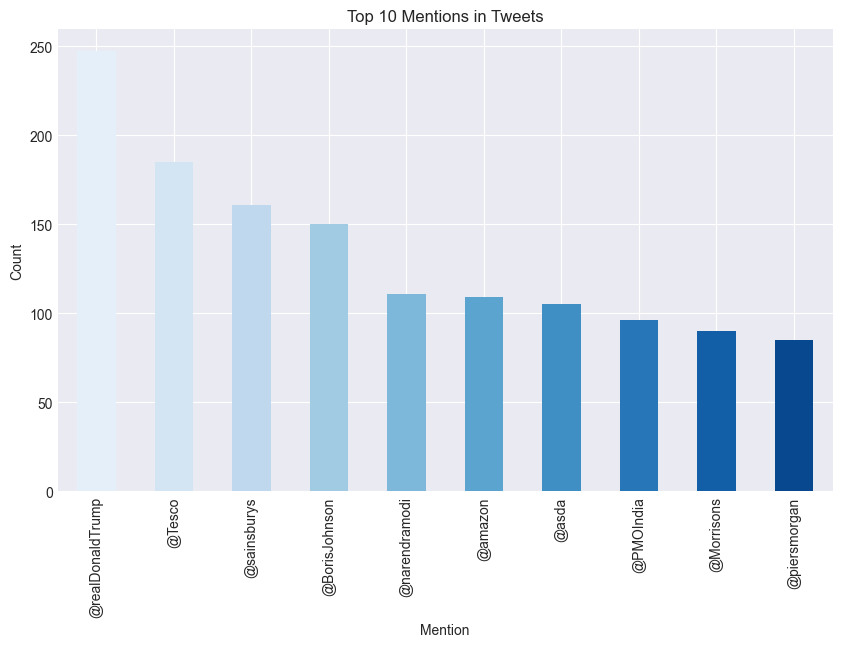

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of each mention
mention_counts = tweet_data['OriginalTweet'].str.count('@\w+').sum()

# Get the top 10 mentions
top_10_mentions = tweet_data['OriginalTweet'].str.extractall('(@\w+)')[0].value_counts().head(10)

# Create a color map based on the count of each mention
colors = sns.color_palette("Blues", len(top_10_mentions))

# Create a bar plot for the top 10 mentions with colors based on the count
plt.figure(figsize=(10, 6))
top_10_mentions.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Mention')
plt.ylabel('Count')
plt.title('Top 10 Mentions in Tweets')

plt.show()


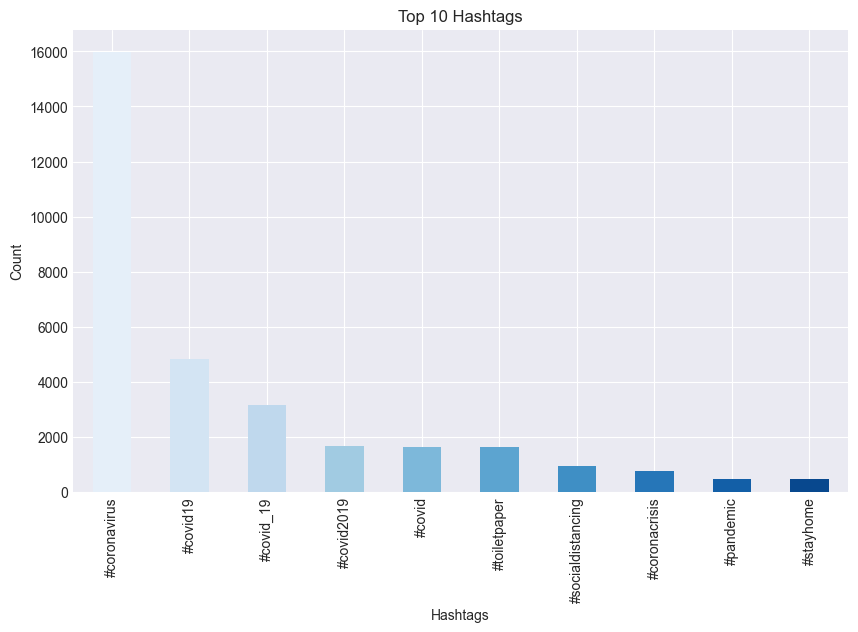

In [23]:
# Extract hashtags from the 'OriginalTweet' column
hashtags = tweet_data['OriginalTweet'].str.findall(r'(?i)\#\w+')

# Flatten the list of hashtags
all_hashtags = [tag.lower() for sublist in hashtags for tag in sublist]

# Count the occurrences of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)

# Create a color map based on the count of each hashtag
colors = sns.color_palette("Blues", len(hashtag_counts))

# Create a bar plot for the top 10 hashtags
plt.figure(figsize=(10, 6))
hashtag_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Hashtags')

# Rotate x-axis labels for better visibility if needed
# plt.xticks(rotation=45)

plt.show()

# Data Preprocessing

In [24]:
# Fill missing values in 'Location' column with 'Unknown'
tweet_data['Location'].fillna('Unknown', inplace=True)  # Replace missing values with 'Unknown'

In [25]:
# Check for null values in the tweet_data DataFrame
null_values = tweet_data.isnull().sum()

# Display the count of null values for each column
print("Null values count:")
print(null_values)

Null values count:
UserName             0
ScreenName           0
Location             0
TweetAt              0
OriginalTweet        0
Sentiment            0
Sorted_Sentiments    0
WordCount            0
CharacterCount       0
dtype: int64


In [26]:
# We will copy the text in another column so that the original text is also there for comparison

tweet_data['text'] = tweet_data.OriginalTweet
tweet_data["text"] = tweet_data["text"].astype(str)

In [27]:
# Function to perform text preprocessing

def clean_tweet(tweet):
    
    # Convert text to lowercase
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r"http\S|www\S|https\S", '', tweet, flags=re.MULTILINE)

    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Remove contractions
    contractions = {
    "ain't": "are not","'s":" is","aren't": "are not","can't": "cannot","can't've": "cannot have",
    "'cause": "because","could've": "could have","couldn't": "could not",
    "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
    "don't": "do not","hadn't": "had not","hadn't've": "had not have",
    "hasn't": "has not","haven't": "have not","he'd": "he would",
    "he'd've": "he would have","he'll": "he will", "he's": "he is",
    "how'd": "how did","how'll": "how will","how's": "how is",
    "i'd": "I would", "i'll": "I will","i'm": "I am","i've": "I have",
    "isn't": "is not","it'd": "it would","it'll": "it will","it's": "it is",
    "let's": "let us","ma'am": "madam","mayn't": "may not",
    "might've": "might have","mightn't": "might not","must've": "must have",
    "mustn't": "must not","needn't": "need not","oughtn't": "ought not",
    "shan't": "shall not","sha'n't": "shall not","she'd": "she would",
    "she'll": "she will","she's": "she is","should've": "should have",
    "shouldn't": "should not","that'd": "that would","that's": "that is",
    "there'd": "there had","there's": "there is","they'd": "they would",
    "they'll": "they will","they're": "they are","they've": "they have",
    "wasn't": "was not","we'd": "we would","we'll": "we will",
    "we're": "we are","we've": "we have","weren't": "were not",
    "what'll": "what will","what're": "what are","what's": "what is",
    "what've": "what have","where'd": "where did","where's": "where is",
    "who'll": "who will","who's": "who is","won't": "will not",
    "wouldn't": "would not","you'd": "you would","you'll": "you will",
    "you're": "you are"
    }
    
    for contraction, replacement in contractions.items():
        tweet = tweet.replace(contraction, replacement)
        
    # Remove extra spaces
    tweet = re.sub('\s+', ' ', tweet).strip()

    
    # Tokenize the text
    tokens = word_tokenize(tweet)
    
    # Remove stopwords that do not affect sentiment
    stop_words = set(stopwords.words('english')) - {'not', 'no', 'but', 'isn\'t', 'aren\'t', 'wasn\'t', 'weren\'t', 'don', "don\'t", 'should', "should\'ve", 'won', "won\'t"}
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    return filtered_tokens

# Apply text preprocessing to the 'text' column
tweet_data['CleanedTweet'] = tweet_data['text'].apply(clean_tweet)

In [28]:
# def correct_spelling(text):
#     spell = SpellChecker()
#     corrected_text = []
#     misspelled_words = spell.unknown(text)
#     for word in text:
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)

# # Apply text preprocessing to the 'CleanedTweet' column
# tweet_data['CorrectedTweet'] = tweet_data['CleanedTweet'].apply(correct_spelling)


In [29]:
# from textblob import TextBlob

# def correct_spelling_with_textblob(tokens):
#     # Initialize an empty list to hold the corrected words
#     corrected_tokens = []

#     # Loop over each word in the token list
#     for word in tokens:
#         # Use TextBlob to correct the word and append it to the corrected_tokens list
#         corrected_tokens.append(TextBlob(word).correct())

#     # Return the corrected tokens
#     return corrected_tokens

# # Apply the correct_spelling_with_textblob function to the 'CleanedTweet' column
# # This will return a new series of corrected token lists which we will store in a new column 'CorrectedTweet'
# tweet_data['CorrectedTweet'] = tweet_data['CleanedTweet'].apply(correct_spelling_with_textblob)


In [30]:
# # Function to perform lemmatization

# def lemmatize_tokens(tokens):
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     return lemmatized_tokens

# # Apply lemmatization to the 'TokenizedTweet' column
# tweet_data['LemmatizedTweet'] = tweet_data['CleanedTweet'].apply(lemmatize_tokens)

In [31]:
# Create an object of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    
    else:          
        return None
    

def lemmatize_sentence(sentence):
    
    # Tokenize the sentence and find the POS tag for each token
    nltk_tagged = pos_tag(sentence)  
    
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

    
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word, tag) if tag is not None else word
                                    for word, tag in wordnet_tagged])
    
#     lemmatized_sentence = []

#     for word, tag in wordnet_tagged:
        
#         if tag is None:
#             # If no tag could be found, add the token as is
#             lemmatized_sentence.append(word)
            
#         else:        
#             # Else use the tag to lemmatize the token
#             lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
            
    return lemmatized_sentence

# Apply lemmatization to each item in the 'CorrectedTweet' column
tweet_data['LemmatizedTweet'] = tweet_data['CleanedTweet'].apply(lemmatize_sentence)

# Wordclouds across all the Sentiments

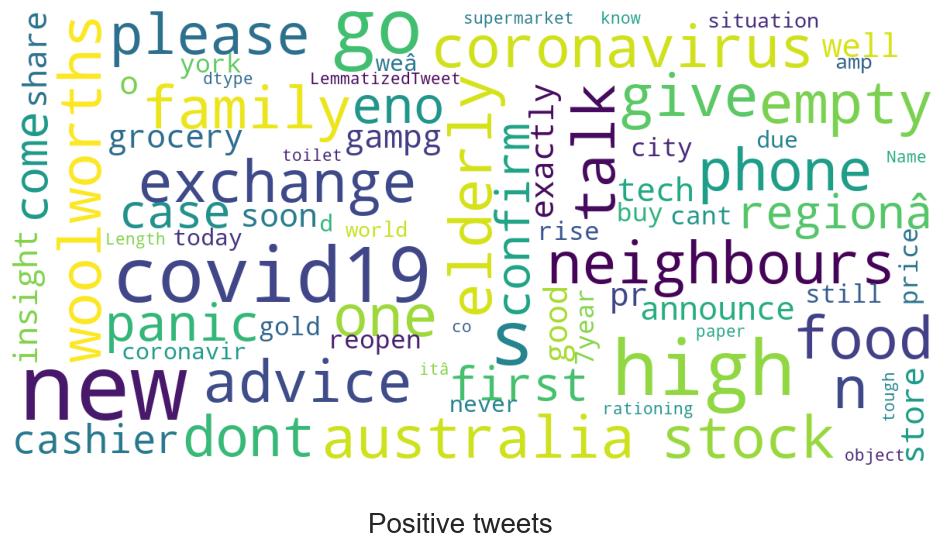

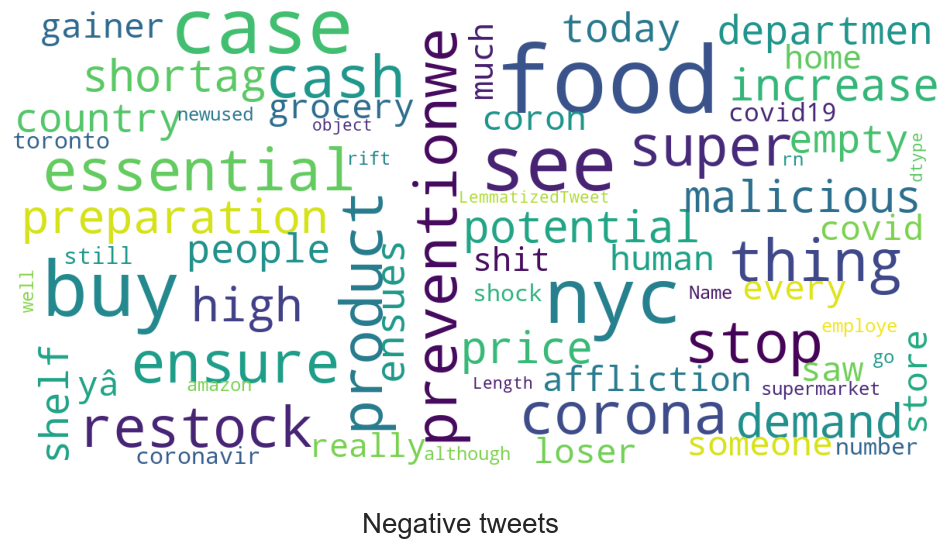

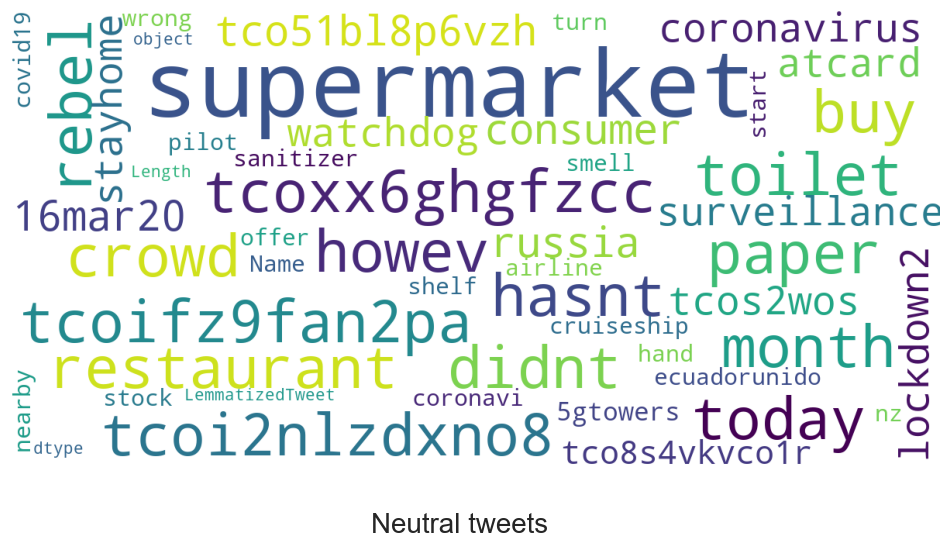

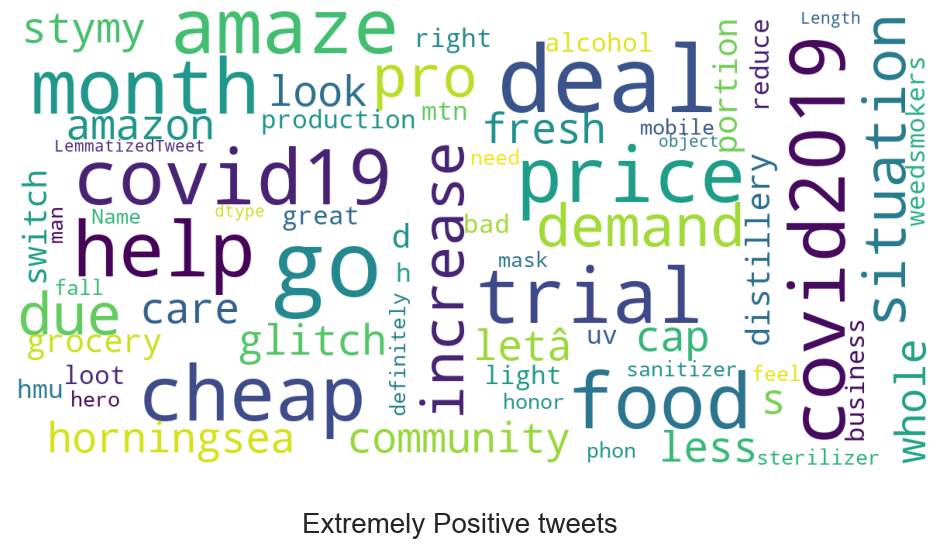

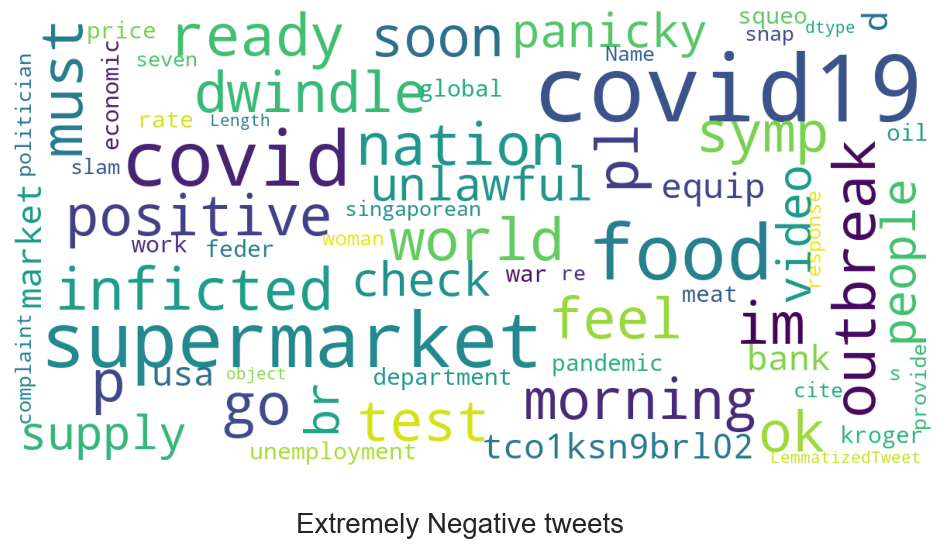

In [32]:
# Function for creating wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

# Extract tweets from different sentiments
positive_tweets = tweet_data[tweet_data['Sentiment']=='Positive']['LemmatizedTweet']
negative_tweets = tweet_data[tweet_data['Sentiment']=='Negative']['LemmatizedTweet']
neutral_tweets = tweet_data[tweet_data['Sentiment']=='Neutral']['LemmatizedTweet']
extremely_positive_tweets = tweet_data[tweet_data['Sentiment']=='Extremely Positive']['LemmatizedTweet']
extremely_negative_tweets = tweet_data[tweet_data['Sentiment']=='Extremely Negative']['LemmatizedTweet']

# Create word cloud for each sentiment
show_wordcloud(positive_tweets, title = 'Positive tweets')
show_wordcloud(negative_tweets, title = 'Negative tweets')
show_wordcloud(neutral_tweets, title = 'Neutral tweets')
show_wordcloud(extremely_positive_tweets, title = 'Extremely Positive tweets')
show_wordcloud(extremely_negative_tweets, title = 'Extremely Negative tweets')


In [33]:
# # Group the dataset by the 'Sentiment' column
# grouped_tweets = tweet_data.groupby('Sentiment')

# # For each sentiment, generate a word cloud
# for name, group in grouped_tweets:
#     # Combine all tweets into one text
#     combined_text = ' '.join(group['LemmatizedTweet'].apply(lambda x: ' '.join(x)).values)

#     wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(combined_text)

#     plt.figure(figsize=(10, 7))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis('off')
#     plt.title(name)
#     plt.show()


In [ ]:
# # There are 5 categories of sentiments in the section, let's convert them to 3 main categories
# tweet_data['Sorted_Sentiments'] = tweet_data['Sentiment'].replace({'Extremely Positive': 2, 'Positive': 2, 'Extremely Negative': 0, 'Negative': 0, 'Neutral': 1})
# plt.figure(figsize=(7,5))
# sns.countplot(x='Sorted_Sentiments',data= tweet_data)
# plt.show()

In [44]:
# Select necessary features
data = tweet_data[['LemmatizedTweet', 'Sentiment']]

# Convert 'Sentiment' into numerical values
# There are 5 categories of sentiments in the section, let's convert them to 3 main categories
data['Sentiment'] = data['Sentiment'].map({'Extremely Negative': 0, 'Negative': 0,'Neutral': 1,'Positive': 2,'Extremely Positive': 2})


# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['LemmatizedTweet'], data['Sentiment'], test_size=0.2, random_state=42)

In [45]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the learned vocabulary from the training data
X_test_tfidf = vectorizer.transform(X_test)

In [46]:
from gensim.models import Word2Vec
import numpy as np

# Train the word2vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to word embeddings
def text_to_word_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[word])
    if len(embeddings) > 0:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

# Convert text data to word embeddings
X_train_embeddings = np.array([text_to_word_embeddings(text) for text in X_train])
X_test_embeddings = np.array([text_to_word_embeddings(text) for text in X_test])


In [47]:
# def model_evaluation(model, X_train, y_train, X_test, y_test):
#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions on train and test data
#     train_predictions = model.predict(X_train)
#     test_predictions = model.predict(X_test)

#     # Calculate metrics for train set
#     train_accuracy = accuracy_score(y_train, train_predictions)

#     # Calculate metrics for test set
#     test_accuracy = accuracy_score(y_test, test_predictions)
#     classification = classification_report(y_test, test_predictions)
#     confusion = confusion_matrix(y_test, test_predictions)

#     # Display the evaluation metrics
#     print("Train Set Accuracy: {:.2f}%".format(train_accuracy * 100))
#     print("Test Set Accuracy: {:.2f}%".format(test_accuracy * 100))
#     print("Precision, Recall, F1-score:")
#     print(classification)
#     print("Confusion Matrix:")
#     print(confusion)


In [51]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    
    # Start the timer
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Calculate the training time
    training_time = time.time() - start_time

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate metrics for train set
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, test_predictions)
    classification = classification_report(y_test, test_predictions)
    confusion = confusion_matrix(y_test, test_predictions)

    # Display the evaluation metrics
    print("Train Set Accuracy: {:.2f}%".format(train_accuracy * 100))
    print("Test Set Accuracy: {:.2f}%".format(test_accuracy * 100))
    print("Training Time: {:.2f} seconds".format(training_time))

    try:
        # Format classification report
        classification_df = pd.DataFrame.from_dict(classification, orient='index')
        classification_df.columns = ['Precision', 'Recall', 'F1-score', 'Support']
        classification_df = classification_df.round(2)
        print("\nPrecision, Recall, F1-score:")
        print(classification_df)
    except AttributeError:
        print("\nInvalid classification report format. Please check the 'classification' variable.")
        print("Classification Report:")
        print(classification)

    # Format confusion matrix
    confusion_df = pd.DataFrame(confusion, columns=np.unique(y_test), index=np.unique(y_test))
    confusion_df.index.name = 'Actual'
    confusion_df.columns.name = 'Predicted'

    # Visualize the evaluation metrics
    print("\nConfusion Matrix:")
    sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
    plt.show()


Train Set Accuracy: 86.63%
Test Set Accuracy: 79.96%
Training Time: 1.26 seconds

Invalid classification report format. Please check the 'classification' variable.
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3062
           1       0.74      0.65      0.69      1553
           2       0.81      0.86      0.83      3617

    accuracy                           0.80      8232
   macro avg       0.79      0.77      0.78      8232
weighted avg       0.80      0.80      0.80      8232


Confusion Matrix:


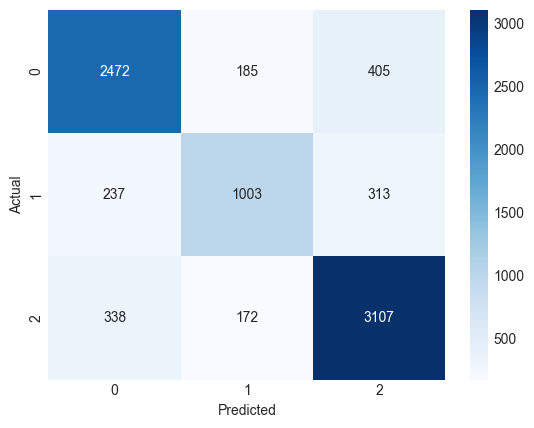

In [52]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Apply the model evaluation function
model_evaluation(logistic_regression, X_train_tfidf, y_train, X_test_tfidf, y_test)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Train Set Accuracy: 86.54%
Test Set Accuracy: 83.70%
Training Time: 18.34 seconds

Invalid classification report format. Please check the 'classification' variable.
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3062
           1       0.77      0.78      0.78      1553
           2       0.86      0.87      0.86      3617

    accuracy                           0.84      8232
   macro avg       0.82      0.83      0.83      8232
weighted avg       0.84      0.84      0.84      8232


Confusion Matrix:


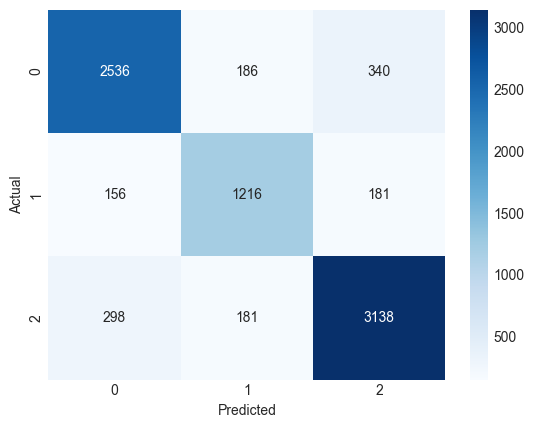

In [53]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Apply the model evaluation function with the best model
model_evaluation(best_logistic_regression, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Create an instance of the Random Forest classifier
random_forest = RandomForestClassifier()

# Apply the model evaluation function
model_evaluation(random_forest, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize a Random Forest classifier with the best hyperparameters
best_random_forest = RandomForestClassifier(**best_params)

# Apply the model evaluation function with the best model
model_evaluation(best_random_forest, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Initialize and train the SVM classifier
SVC_Model = SVC(max_iter=10000)

# Apply the model evaluation function
model_evaluation(SVC_Model, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
svm_classifier = SVC(max_iter=10000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize an SVM classifier with the best hyperparameters
best_svm_classifier = SVC(**best_params)

# Apply the model evaluation function with the best model
model_evaluation(best_svm_classifier, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Initialize and train the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Apply the model evaluation function
model_evaluation(naive_bayes, X_train_tfidf, y_train, X_test_tfidf, y_test)

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_prior': [True, False]
}

# Initialize the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Initialize a Naive Bayes classifier with the best hyperparameters
best_naive_bayes = MultinomialNB(**best_params)

# Apply the model evaluation function with the best model
model_evaluation(best_naive_bayes, X_train_tfidf, y_train, X_test_tfidf, y_test)